# Dimensionality Reduction and Clustering

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [66]:
mnist = datasets.load_digits()

In [67]:
x = mnist.data
y = mnist.target

## 1. PCA

In [69]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Explained Variance by Components')

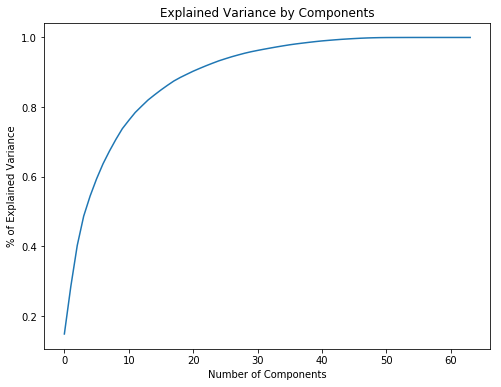

In [104]:
pca = PCA()
x_pca = pca.fit_transform(x)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylabel('% of Explained Variance')
plt.xlabel('Number of Components')
plt.title('Explained Variance by Components')

a) How many components did you use? Why?

We are going to use 30 components with PCA because it explains most of the variance in the data. After 30, the increase in explained variance is small and not worth the extra components. We could probably realistically do just fine with anywhere between 15 and 30 because more of the variance is captured. I am going to go with 30 though because I feel like that is the limit of where we gain any significant advantage.

Text(0.5, 1.0, 'First 2 Principle Components')

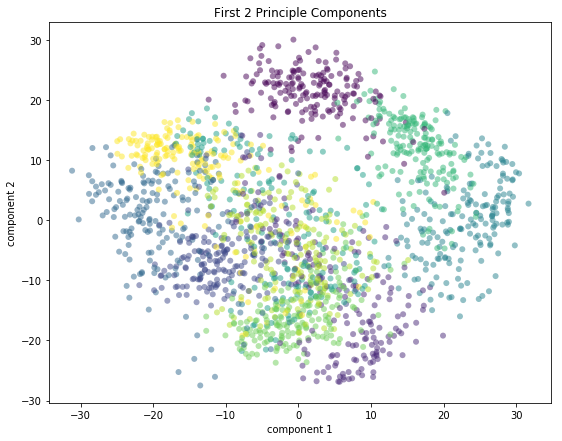

In [111]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(x)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

b) Plot the first two components. Do you notice any trends? What is the plot showing us?

When plotting the first two components, it is hard to see any real trends in the data when it is plotted. This is showing us the variance among our data points between the first and second components.

c) Why would you use PCA? What is it doing? What are the drawbacks?

PCA is used to reduce the dimensionality of data. It creates components that capture the maximum amount of variance not captured by previous components. You could use it to help feed high dimensional data into a model that does not perform well with high dimensions, such as K-Nearest Neighbors. One drawback is that it just isn't that useful in general since a lot of algorithms handle high dimensional data very effectively now. It can also take away from the interpretability of a model because feature importances can not be used to explain what the model is using to make predictions. Some other drawbacks are that it relies on linear assumptions and orthoganal transformations.

In [75]:
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(6, 5),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

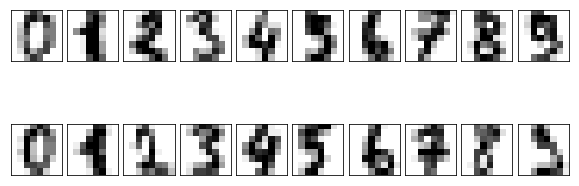

In [74]:
plot_digits(x)

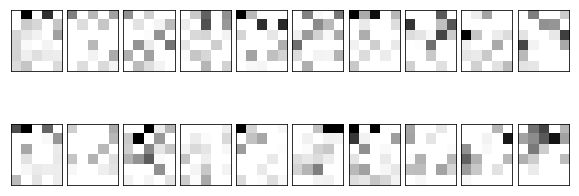

In [76]:
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(x)
plot_digits(x_pca)

d) Plot some of the images, then compress them using PCA and plot again. How does it look?

When compressed, you can not even tell which numbers are which.

## 2. T-SNE

In [50]:
from sklearn.manifold import TSNE

In [77]:
rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.058s...
[t-SNE] Computed neighbors for 1000 samples in 0.313s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 9.730434
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.104042
[t-SNE] KL divergence after 1000 iterations: 0.584028


In [78]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5, 1.0, 'T-SNE')

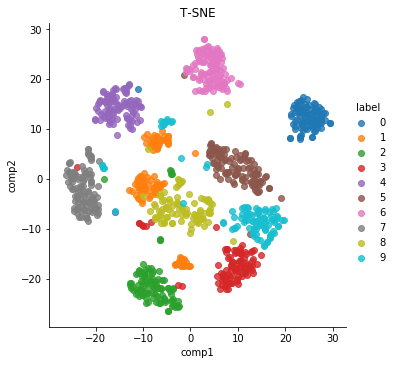

In [112]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

a) How does this plot differ from your PCA plot?

This plot has the clusters plotted much more tightly together. There is also less overlap and significantly more distance between each of the clusters. 

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.168s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 6.673393
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.896858
[t-SNE] KL divergence after 1000 iterations: 0.716751


Text(0.5, 1.0, 'T-SNE (Perplexity 10)')

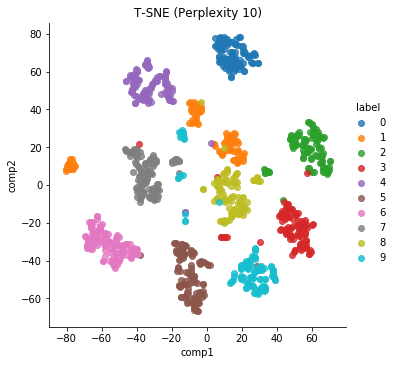

In [113]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (Perplexity 10)')

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.006s...
[t-SNE] Computed neighbors for 1000 samples in 0.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 5.045795
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.482468
[t-SNE] KL divergence after 1000 iterations: 0.743785


Text(0.5, 1.0, 'T-SNE (Perplexity 3)')

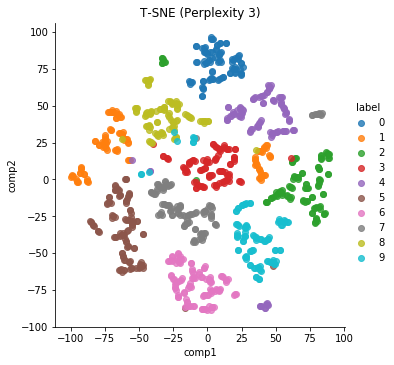

In [114]:
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (Perplexity 3)')

b) How robust is it to changes in perplexity?

Changing the perplexity from 50 to 10 had very little impact on the quality of the clusters. They moved a little bit but were still tightly clustered correctly. When we drop the perplexity to 3, we can see that the clusters begin to spread out and show some overlap between the different groups. This is why perplexity is recommended to stay between 5 & 50.

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.897261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.389496
[t-SNE] KL divergence after 300 iterations: 0.697794


Text(0.5, 1.0, 'T-SNE (300 Iterations)')

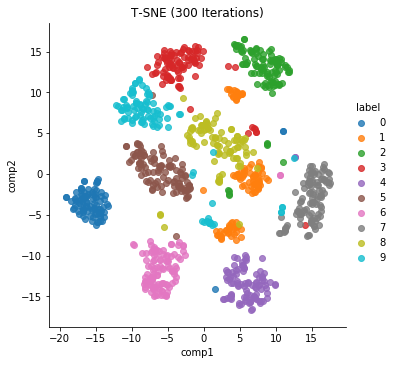

In [115]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (300 Iterations)')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.897261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.529549
[t-SNE] KL divergence after 1000 iterations: 0.616581


Text(0.5, 1.0, 'T-SNE (Learning Rate 5)')

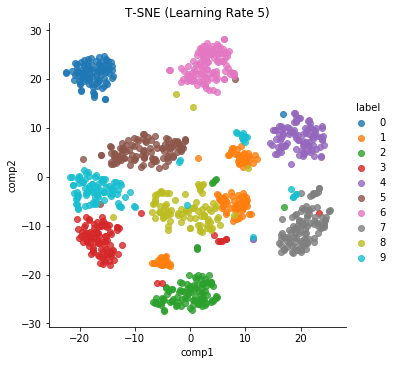

In [116]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=5)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE (Learning Rate 5)')

c) How robust is it to a different learning rate and number of iterations?

With both a change in the number of iterations from 1000 to 300, and the learning rate from 200 to 5, the clusters remain pretty good. Looking at the graphs we can notice that there are a few more stragglers floating in other clusters, but for the most part the clusters look correct. 

## 3. K-Means Clustering

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [108]:
kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(x)
labels = kmeans.labels_
silhouette_score(x, labels, metric='euclidean')

0.18236389238113193

a) How did you choose K?

I selected k as 10 because I have a prior knowledge to the problem at hand. Because I know that there should be ten groups, one for each number, it made selecting k easy.

b) How did you evaluate your clustering?

To evaluate my clustering I used a silhouette coefficient which returns a score based on how dense and seperated my clusters are from each other. 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 7.615032
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.495918
[t-SNE] KL divergence after 1000 iterations: 0.632372


Text(0.5, 1.0, 'K-Means Clustering')

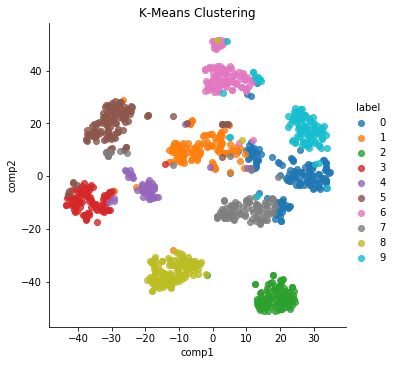

In [117]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

c) Visualize your clusters using T-SNE.

d) Did you scale your data?

I did not scale my data for this problem. Because I am not looking at features that are different from one another in nature, I did not feel that scaling was necessary. Each feature is already on the same scale.

e) How robust is your clustering?

Clustering did a decent job of picking out groups from the data. It was not as robust as using PCA and T-SNE but still did a pretty good job of creating seperate groups of data. 

## 4. Hierarchical Clustering

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [101]:
x_cluster = x[:100]

a) Plot your dendrogram.

Text(0.5, 1.0, 'Complete Linkage')

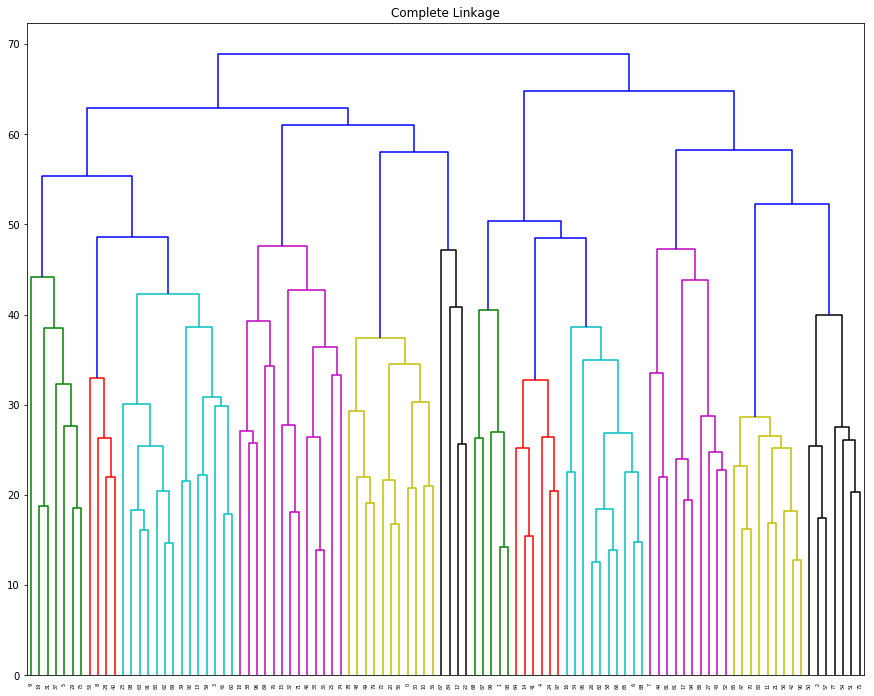

In [118]:
#Only use 100 observations
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Complete Linkage')

b) How many clusters seem reasonable based on your graph?

The graph suggest that 8 or 9 might be the best number of clusters if we look around the 50 mark on the y-axis. This is pretty close to in-line with the number of clusters we would expect after being familiar with our data.

Text(0.5, 1.0, 'Ward Linkage')

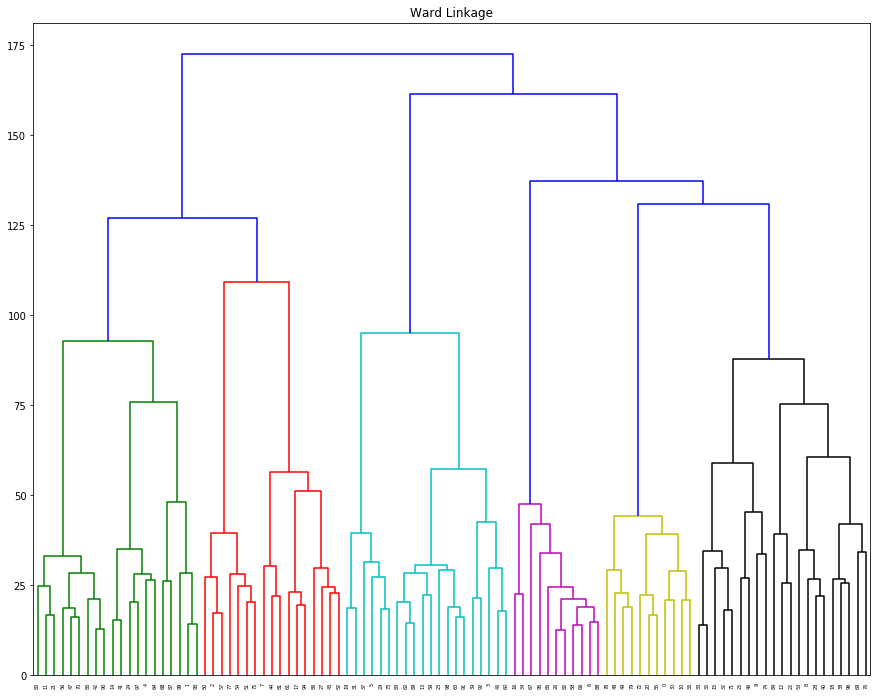

In [119]:
Z = linkage(x_cluster, 'ward')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Ward Linkage')

Text(0.5, 1.0, 'Average Linkage')

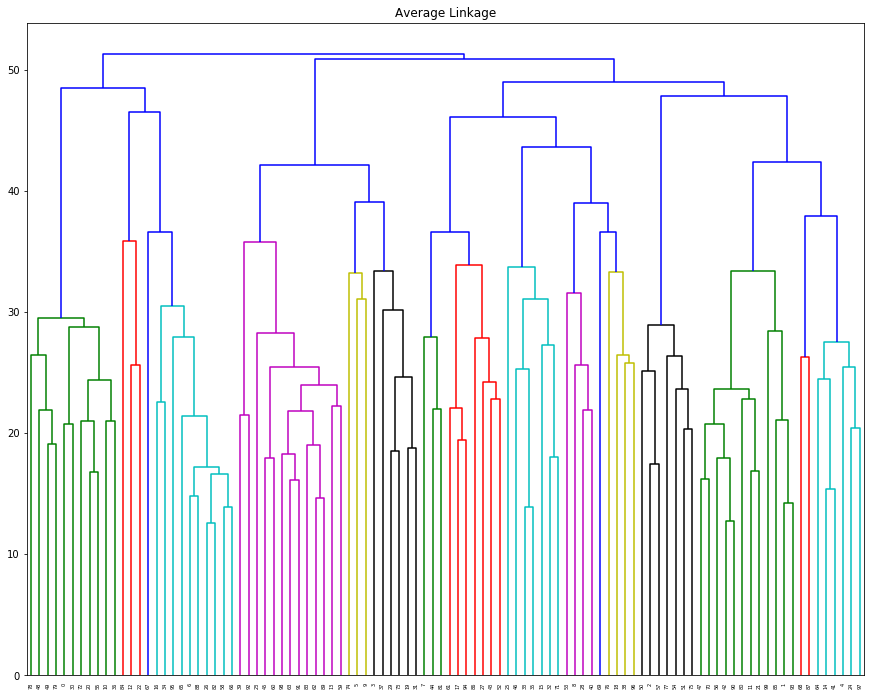

In [120]:
Z = linkage(x_cluster, 'average')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Average Linkage')

c) How does your dendrogram change with different linkage methods?

With the ward linkage, the dendrogram makes a lot of connections farther down on the graph. It suggests about 10 clusters being optimal for clustering. The average linkage linked everything together by the 50 mark on the y-axis. It is a little messier but also suggests about 8 or 9 clusters.